In [48]:
import pandas as pd
import os
import pyproj
from pyproj import Transformer
import cameratransform as ct

In [49]:
help(ct.SpatialOrientation)

Help on class SpatialOrientation in module cameratransform.spatial:

class SpatialOrientation(cameratransform.parameter_set.ClassWithParameterSet)
 |  SpatialOrientation(elevation_m=None, tilt_deg=None, roll_deg=None, heading_deg=None, pos_x_m=None, pos_y_m=None)
 |  
 |  The orientation can be represented as a matrix multiplication in *projective coordinates*. First, we define rotation
 |  matrices around the three angles: *tilt*, *roll*, *heading*:
 |  
 |  .. math::
 |      R_{\mathrm{roll}} &=
 |      \begin{pmatrix}
 |      \cos(\alpha_\mathrm{roll}) & \sin(\alpha_\mathrm{roll}) & 0\\
 |      -\sin(\alpha_\mathrm{roll}) & \cos(\alpha_\mathrm{roll}) & 0\\
 |      0 & 0 & 1\\
 |       \end{pmatrix}\\
 |      R_{\mathrm{tilt}} &=
 |      \begin{pmatrix}
 |      1 & 0 & 0\\
 |      0 & \cos(\alpha_\mathrm{tilt}) & \sin(\alpha_\mathrm{tilt}) \\
 |      0 & -\sin(\alpha_\mathrm{tilt}) & \cos(\alpha_\mathrm{tilt}) \\
 |       \end{pmatrix}\\
 |       R_{\mathrm{heading}} &=
 |      \begi

In [9]:
help(pyproj.transform)

Help on function transform in module pyproj.transformer:

transform(p1: Any, p2: Any, x: Any, y: Any, z: Optional[Any] = None, tt: Optional[Any] = None, radians: bool = False, errcheck: bool = False, always_xy: bool = False)
    .. versionadded:: 2.2.0 always_xy
    
    .. deprecated:: 2.6.1
        This function is deprecated. See: :ref:`upgrade_transformer`
    
    x2, y2, z2 = transform(p1, p2, x1, y1, z1)
    
    Transform points between two coordinate systems defined by the
    Proj instances p1 and p2.
    
    The points x1,y1,z1 in the coordinate system defined by p1 are
    transformed to x2,y2,z2 in the coordinate system defined by p2.
    
    z1 is optional, if it is not set it is assumed to be zero (and
    only x2 and y2 are returned). If the optional keyword
    'radians' is True (default is False), then all input and
    output coordinates will be in radians instead of the default
    of degrees for geographic input/output projections.
    If the optional keyword 'er

In [36]:
df_marks = pd.read_csv('../DATA/GCP_IMAGES/101_0001/101_0001_GCP.MRK')

# Parse out the filename from the path
df_marks['Filename']=[os.path.basename(p).split('\\')[1] for p in df_marks['Path']]
df_marks = df_marks.set_index('Filename')

#tidy up ellipoidal height
df_marks['EllipsoideHight'] = df_marks['EllipsoideHight'].str.replace(',Ellh','').astype('float')

# Convert the marks to Eastings and Northings
transformer = Transformer.from_crs(pyproj.CRS('EPSG:4327').to_3d(), 
                                   pyproj.CRS('EPSG:7850+EPSG:5711').to_3d(), 
                                   always_xy=True)
df_marks['UAV_Eastings'], df_marks['UAV_Northings'], df_marks['UAV_Z'] = transformer.transform(df_marks['Longitude'],df_marks['Latitude'],df_marks['EllipsoideHight'])

drone_location = df_marks[['UAV_Eastings','UAV_Northings','UAV_Z']]
drone_location

,UAV_Eastings,UAV_Northings,UAV_Z
Filename,,,
101_0001_0002.JPG,394544.202734,6.459567e+06,88.546450
101_0001_0021.JPG,394631.826848,6.459659e+06,88.373600
101_0001_0068.JPG,394511.807591,6.459683e+06,88.592447
101_0001_0099.JPG,394566.343655,6.459685e+06,88.532659
101_0001_0113.JPG,394645.847291,6.459615e+06,88.540921


In [44]:
df_meta = pd.read_csv('../DATA/GCP_IMAGES/101_0001/drone.csv')
#Parse out the filename from the path
df_meta['Filename']=[os.path.basename(p) for p in df_meta['SourceFile']]
print(df_meta.columns)
df_meta = df_meta.set_index('Filename')
gimbal_angles = df_meta[['XMP:GimbalYawDegree', 'XMP:GimbalPitchDegree', 'XMP:FlightRollDegree','XMP:RelativeAltitude']]
gimbal_angles = gimbal_angles.rename(columns={'XMP:RelativeAltitude':'UAV_Altitude',
                                      'XMP:GimbalYawDegree':'Gimbal_Yaw',
                                      'XMP:GimbalPitchDegree':'Gimbal_Pitch',
                                      'XMP:FlightRollDegree':'Gimbal_Roll'})
gimbal_angles

Index(['Unnamed: 0', 'SourceFile', 'EXIF:GPSLatitudeRef', 'EXIF:GPSLatitude',
       'EXIF:GPSLongitudeRef', 'EXIF:GPSLongitude', 'EXIF:GPSAltitudeRef',
       'EXIF:GPSAltitude', 'XMP:RtkFlag', 'XMP:DewarpFlag',
       'XMP:AbsoluteAltitude', 'XMP:RelativeAltitude', 'XMP:GPSLatitude',
       'XMP:GPSLongtitude', 'XMP:GimbalRollDegree', 'XMP:GimbalYawDegree',
       'XMP:GimbalPitchDegree', 'XMP:FlightRollDegree', 'XMP:FlightYawDegree',
       'XMP:FlightPitchDegree', 'XMP:CamReverse', 'XMP:GimbalReverse',
       'XMP:CalibratedFocalLength', 'XMP:CalibratedOpticalCenterX',
       'XMP:CalibratedOpticalCenterY', 'Filename'],
      dtype='object')


,Gimbal_Yaw,Gimbal_Pitch,Gimbal_Roll,UAV_Altitude
Filename,,,,
101_0001_0002.JPG,55.1,-60.0,0.8,75.04
101_0001_0021.JPG,-124.9,-60.0,4.9,74.88
101_0001_0068.JPG,145.2,-60.0,14.0,75.07
101_0001_0099.JPG,145.0,-60.0,11.3,75.03
101_0001_0113.JPG,-38.1,-60.0,-13.5,75.06


In [45]:
# Join the dataframes on filename
df_combined = drone_location.join(gimbal_angles)
df_combined

,UAV_Eastings,UAV_Northings,UAV_Z,Gimbal_Yaw,Gimbal_Pitch,Gimbal_Roll,UAV_Altitude
Filename,,,,,,,
101_0001_0002.JPG,394544.202734,6.459567e+06,88.546450,55.1,-60.0,0.8,75.04
101_0001_0021.JPG,394631.826848,6.459659e+06,88.373600,-124.9,-60.0,4.9,74.88
101_0001_0068.JPG,394511.807591,6.459683e+06,88.592447,145.2,-60.0,14.0,75.07
101_0001_0099.JPG,394566.343655,6.459685e+06,88.532659,145.0,-60.0,11.3,75.03
101_0001_0113.JPG,394645.847291,6.459615e+06,88.540921,-38.1,-60.0,-13.5,75.06


In [60]:
df_gcps = pd.read_csv('../DATA/GCP_IMAGES/101_0001/101_0001_combinedGCPjsonMRK.csv')
df_gcps = df_gcps.set_index('Filename')
print(df_gcps.columns)
df_gcps = df_gcps[['Easting','Northing','AHD Height','img_x','img_y']].rename(columns={'Easting':'GCP_Eastings',
                                                               'Northing':'GCP_Northings',
                                                               'AHD Height':'GCP_Z'})
df_gcps = df_gcps.join(df_combined)
df_gcps


Index(['Easting', 'Northing', 'AHD Height', 'img_x', 'img_y',
       'EXIF:GPSLatitudeRef', 'EXIF:GPSLatitude', 'EXIF:GPSLongitudeRef',
       'EXIF:GPSLongitude', 'EXIF:GPSAltitudeRef', 'EXIF:GPSAltitude',
       'XMP:RtkFlag', 'XMP:DewarpFlag', 'XMP:AbsoluteAltitude',
       'XMP:RelativeAltitude', 'XMP:GPSLatitude', 'XMP:GPSLongtitude',
       'XMP:GimbalRollDegree', 'XMP:GimbalYawDegree', 'XMP:GimbalPitchDegree',
       'XMP:FlightRollDegree', 'XMP:FlightYawDegree', 'XMP:FlightPitchDegree',
       'XMP:CamReverse', 'XMP:GimbalReverse', 'XMP:CalibratedFocalLength',
       'XMP:CalibratedOpticalCenterX', 'XMP:CalibratedOpticalCenterY',
       'GPSSecondOfWeek', 'GPSWeekNumber', 'NorthOff', 'EastOff', 'VelOff',
       'Latitude', 'Longitude', 'EllipsoideHight', 'Error', 'RTKFlag',
       'UTCTime'],
      dtype='object')


,GCP_Eastings,GCP_Northings,GCP_Z,img_x,img_y,UAV_Eastings,UAV_Northings,UAV_Z,Gimbal_Yaw,Gimbal_Pitch,Gimbal_Roll,UAV_Altitude
Filename,,,,,,,,,,,,
101_0001_0002.JPG,394589.981,6459629.776,11.899,2098.727273,744.242424,394544.202734,6.459567e+06,88.546450,55.1,-60.0,0.8,75.04
101_0001_0002.JPG,394562.677,6459648.234,12.401,883.597884,976.719577,394544.202734,6.459567e+06,88.546450,55.1,-60.0,0.8,75.04
101_0001_0002.JPG,394562.677,6459648.234,12.401,1108.739362,1332.180851,394544.202734,6.459567e+06,88.546450,55.1,-60.0,0.8,75.04
101_0001_0002.JPG,394571.256,6459639.176,12.185,1360.322034,960.338983,394544.202734,6.459567e+06,88.546450,55.1,-60.0,0.8,75.04
101_0001_0002.JPG,394578.040,6459645.103,12.341,1405.992509,714.981273,394544.202734,6.459567e+06,88.546450,55.1,-60.0,0.8,75.04
101_0001_0021.JPG,394589.981,6459629.776,11.899,2681.456954,1598.337748,394631.826848,6.459659e+06,88.373600,-124.9,-60.0,4.9,74.88
101_0001_0021.JPG,394562.677,6459648.234,12.401,3916.471963,1285.390187,394631.826848,6.459659e+06,88.373600,-124.9,-60.0,4.9,74.88
101_0001_0021.JPG,394571.256,6459639.176,12.185,3434.097035,1314.555256,394631.826848,6.459659e+06,88.373600,-124.9,-60.0,4.9,74.88
101_0001_0021.JPG,394562.677,6459648.234,12.401,3542.027821,952.052550,394631.826848,6.459659e+06,88.373600,-124.9,-60.0,4.9,74.88


In [69]:
# Setup the camera for each acquisition and project

# DJI P4RTK Camera Sensor Parameters
image_width_px =  5472
image_height_px = 3648
focallength_x_px, focallength_y_px = 3666.666504, 3666.666504 #in pixels

sensor_width_mm = 13.1
sensor_height_mm = sensor_width_mm/image_width_px*image_height_px
focallength_mm = 8.8

# row=df_gcps.iloc[0]

def reprojection_error(row):

    # initialize the camera
    cam = ct.Camera(ct.RectilinearProjection(focallength_x_px=focallength_x_px,
                                            focallength_y_px=focallength_y_px,
                                            image_height_px=image_height_px,
                                            image_width_px=image_width_px,
                                            ),
                    ct.SpatialOrientation(elevation_m=row.UAV_Z,
                                        pos_x_m=row.UAV_Eastings, 
                                        pos_y_m=row.UAV_Northings,
                                        tilt_deg=90+row.Gimbal_Pitch,
                                        heading_deg=row.Gimbal_Yaw,
                                        roll_deg=row.Gimbal_Roll,
                                        ))
    row['reproj_x'],row['reproj_y'] = cam.imageFromSpace([row.GCP_Eastings,row.GCP_Northings,row.GCP_Z])
    return row

df_results = df_gcps.apply(reprojection_error,axis=1)

In [70]:
df_results['error_px'] = ((df_results['img_x']-df_results['reproj_x'])**2+(df_results['img_y']-df_results['reproj_y'])**2)**0.5

<Axes: >

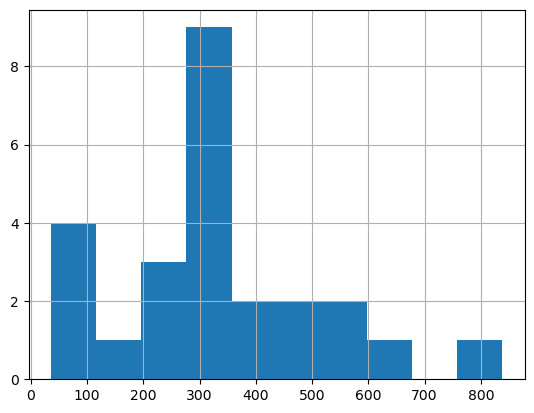

In [72]:
df_results['error_px'].hist()